# This project is base on fraud detection 

Fraud dection is essential for organisation because it helps identify identifying suspicious or unauthorized activity that could indicate fraudulent behavior, especially in online transactions and digital interactions. The goal of this project is to minimizing the risks associated with fraudulent activities that can significantly impact a business's operations, financial health, and reputation. In essence, an effective fraud detection system is essential for minimizing risk, safeguarding assets, maintaining trust, and ensuring the continued health and growth of the business. 

# Setup and Data Loading

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score
from tensorflow import keras
from tensorflow.keras import layers, callbacks


#df = pd.read_csv(path)
df = pd.read_csv('C:/Users/funge/Downloads/creditcard.csv')

# Explore the data
print(df.head())
print("\nClass distribution:")
print(df['Class'].value_counts())
print(f"\nFraud percentage: {df['Class'].value_counts()[1]/len(df)*100:.4f}%")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Data Preprocessing

In [6]:
# Since all features except Time and Amount are already PCA transformed, we'll scale these two
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Building the Neural Network Model

In [8]:
def create_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')
        ]
    )
    return model

# Create and display model
model = create_model(X_train.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 448 (1.75 KB)

# Train Model

In [10]:

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    #batch_size=2048,
    verbose=1
)

Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9607 - auc: 0.7982 - loss: 0.1031 - precision: 0.0530 - recall: 0.4711 - val_accuracy: 0.9993 - val_auc: 0.9284 - val_loss: 0.0155 - val_precision: 0.7767 - val_recall: 0.8163
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9993 - auc: 0.9050 - loss: 0.0041 - precision: 0.8647 - recall: 0.6610 - val_accuracy: 0.9993 - val_auc: 0.9182 - val_loss: 0.0107 - val_precision: 0.7921 - val_recall: 0.8163
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9992 - auc: 0.9200 - loss: 0.0042 - precision: 0.8499 - recall: 0.6545 - val_accuracy: 0.9993 - val_auc: 0.9436 - val_loss: 0.0200 - val_precision: 0.7642 - val_recall: 0.8265
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9993 - auc: 0.9274 - loss: 0.0036 - precision: 0.8336 - recall: 0.7096 - val_accuracy: 0.9993 - val_auc: 0.9385 - val_loss: 0.0116 - val_precision: 0.7767 - val_recall: 0.8163
Epoch 5/20
7121/7121

# Evaluate the Model

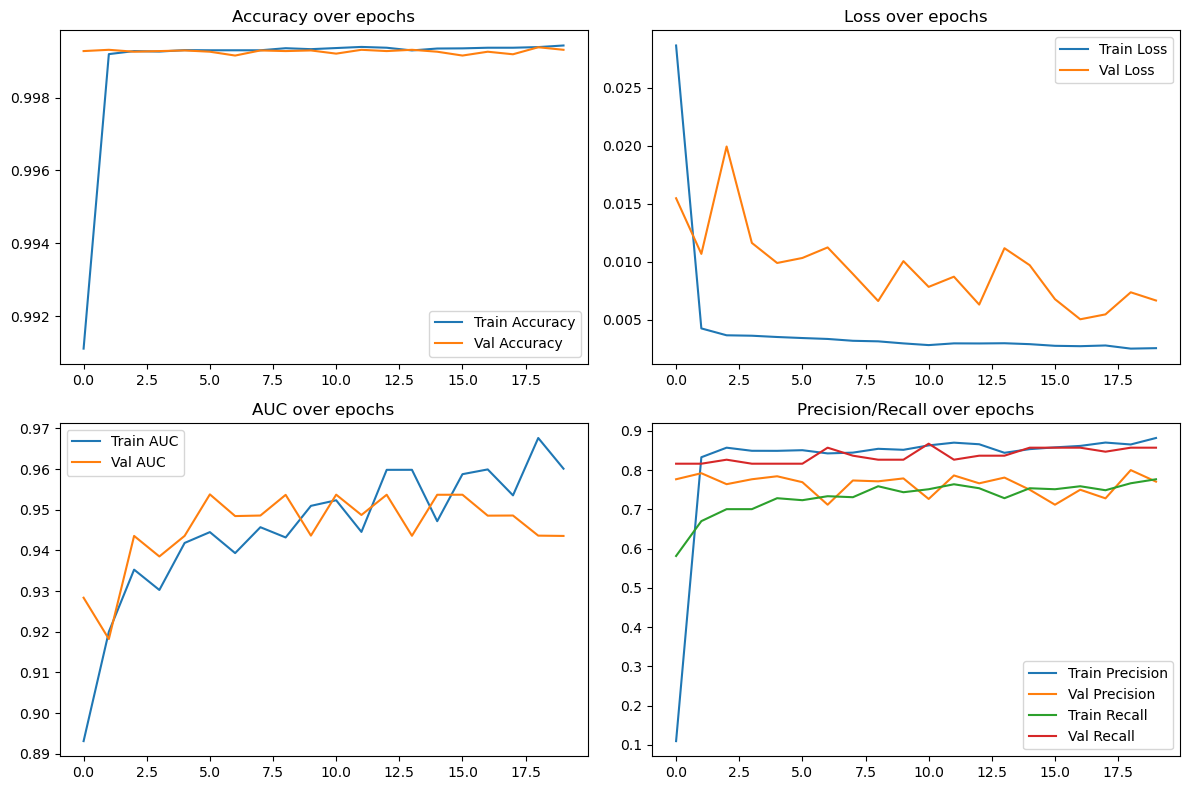

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56839    25]
 [   14    84]]

ROC AUC Score: 0.9736


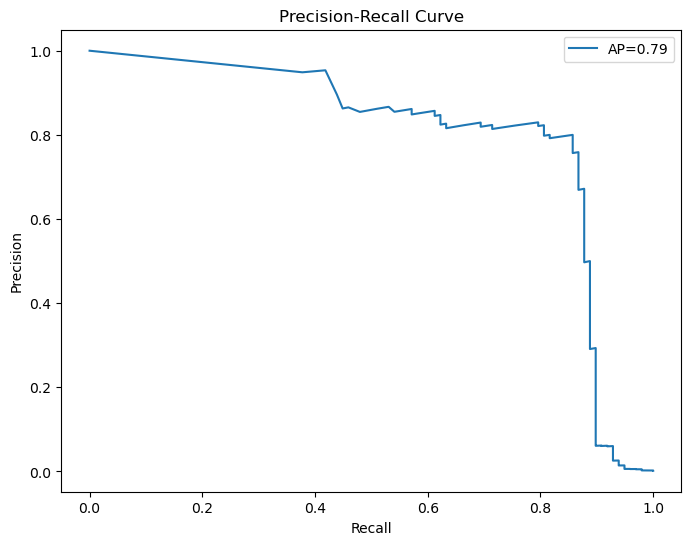

In [12]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.title('AUC over epochs')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(history.history['precision'], label='Train Precision')
    plt.plot(history.history['val_precision'], label='Val Precision')
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Val Recall')
    plt.title('Precision/Recall over epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# How to deploy 

# This code can be deploy using different methods such as first save the model and then load it into an API or containerize with docker etc.
# For example: Deploying into Azure as follows

In [ ]:
import azure.functions as func
import json
import pandas as pd
import tensorflow as tf

def main(req: func.HttpRequest) -> func.HttpResponse:
    model.save('fraud_detection_model.h5')
    model = tf.keras.models.load_model('fraud_detection_model.h5')
    data = req.get_json()
    
    return func.HttpResponse(json.dumps(result))